In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('/Volumes/Sachin/ML-Projects/new-project/data/inventory.db')

In [3]:
tables = pd.read_sql_query(" select name from sqlite_master where type='table'",conn)

In [4]:
for table in tables['name']:
    print("Table Name: ", table)
    df = pd.read_sql_query(f"select * from {table} limit 5", conn)
    display(df)

Table Name:  purchases


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


Table Name:  purchase_prices


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


Table Name:  vendor_invoice


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


Table Name:  begin_inventory


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


Table Name:  end_inventory


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


In [6]:
purchase_aggregated_df = pd.read_sql_query("""
                  select
                  p.PONumber,
                  count(distinct p.Brand) as total_brands,
                  sum(p.Quantity) as total_item_quantity,
                  sum(p.Dollars) as total_item_dollars,
                  avg(julianday(p.ReceivingDate) - julianday(p.PODate)) as avg_recieving_delay
                  from purchases p
                  group by p.PONumber
                  
                  """,conn)

In [8]:
pd.read_sql_query("""
                  select 
                  vi.Quantity as invoice_quantity,
                  vi.Dollars as invoice_dollars,
                  vi.Freight,
                  (julianday(vi.InvoiceDate) - julianday(vi.PODate)) as days_po_to_invoice,
                  (julianday(vi.PayDate) - julianday(vi.InvoiceDate)) as days_to_pay
                  from vendor_invoice vi
                  """,conn)

,invoice_quantity,invoice_dollars,Freight,days_po_to_invoice,days_to_pay
0,6,214.26,3.47,14.0,43.0
1,15,140.55,8.57,16.0,45.0
2,5,106.60,4.61,16.0,38.0
3,10100,137483.78,2935.20,23.0,24.0
4,1935,15527.25,429.20,14.0,36.0
...,...,...,...,...,...
5538,90,1563.00,8.60,16.0,35.0
5539,4617,37300.48,186.50,18.0,39.0
5540,9848,202815.78,932.95,11.0,33.0
5541,24747,149007.56,819.54,14.0,36.0


In [20]:
df = pd.read_sql_query("""
                  with purchase_agg as (
                      select
                        p.PONumber as PONumber,
                        count(distinct p.Brand) as total_brands,
                        sum(p.Quantity) as total_item_quantity,
                        sum(p.Dollars) as total_item_dollars,
                        avg(julianday(p.ReceivingDate) - julianday(p.PODate)) as avg_recieving_delay
                    from purchases p
                    group by p.PONumber 
                  )
                  
                  select
                    vi.Quantity as invoice_quantity,
                    vi.Dollars as invoice_dollars,
                    vi.Freight,
                    (julianday(vi.InvoiceDate) - julianday(vi.PODate)) as days_po_to_invoice,
                    (julianday(vi.PayDate) - julianday(vi.InvoiceDate)) as days_to_pay,
                    pa.PONumber,
                    pa.total_brands,
                    pa.total_item_quantity,
                    pa.total_item_dollars,
                    pa.avg_recieving_delay
                  from vendor_invoice vi
                  left join purchase_agg pa
                    on vi.PONumber = pa.PONumber
                  """,conn)

In [21]:
df

,invoice_quantity,invoice_dollars,Freight,days_po_to_invoice,days_to_pay,PONumber,total_brands,total_item_quantity,total_item_dollars,avg_recieving_delay
0,6,214.26,3.47,14.0,43.0,8124,1,6,214.26,12.000000
1,15,140.55,8.57,16.0,45.0,8137,2,15,140.55,10.333333
2,5,106.60,4.61,16.0,38.0,8169,1,5,106.60,9.000000
3,10100,137483.78,2935.20,23.0,24.0,8106,81,10100,137483.78,12.614130
4,1935,15527.25,429.20,14.0,36.0,8170,29,1935,15527.25,8.752809
...,...,...,...,...,...,...,...,...,...,...
5538,90,1563.00,8.60,16.0,35.0,13626,2,223,6823.18,5.871795
5539,4617,37300.48,186.50,18.0,39.0,13661,110,24747,149007.56,5.050500
5540,9848,202815.78,932.95,11.0,33.0,13643,5,180,2559.72,5.000000
5541,24747,149007.56,819.54,14.0,36.0,13602,83,43240,318075.65,8.045541


In [22]:
df.isnull().sum()

invoice_quantity       0
invoice_dollars        0
Freight                0
days_po_to_invoice     0
days_to_pay            0
PONumber               0
total_brands           0
total_item_quantity    0
total_item_dollars     0
avg_recieving_delay    0
dtype: int64

In [23]:
df.dtypes

invoice_quantity         int64
invoice_dollars        float64
Freight                float64
days_po_to_invoice     float64
days_to_pay            float64
PONumber                 int64
total_brands             int64
total_item_quantity      int64
total_item_dollars     float64
avg_recieving_delay    float64
dtype: object

In [25]:
def create_invoice_risk_label(row):
    
    # Invoice total mismatch with item-level total
    if(abs(row['invoice_dollars'] - row['total_item_dollars']) > 5):
        return 1
    
    # Abnormally high receiving dealy
    if row['avg_recieving_delay'] > 10:
        return 1
    
    return 0

df['flag_invoice'] = df.apply(create_invoice_risk_label, axis=1)
df['flag_invoice'].value_counts()
    

flag_invoice
0    3693
1    1850
Name: count, dtype: int64

<Axes: xlabel='flag_invoice'>

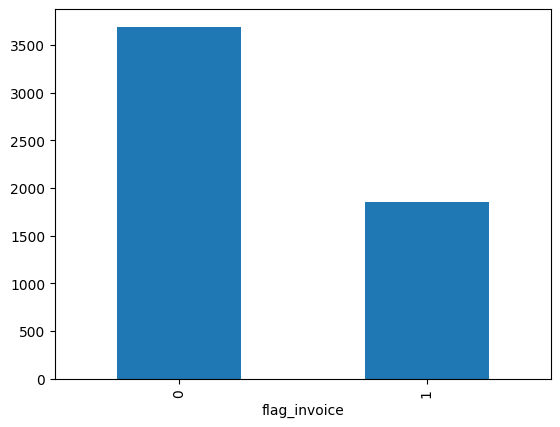

In [26]:
df['flag_invoice'].value_counts().plot(kind='bar')

In [28]:
df.corr()

,invoice_quantity,invoice_dollars,Freight,days_po_to_invoice,days_to_pay,PONumber,total_brands,total_item_quantity,total_item_dollars,avg_recieving_delay,flag_invoice
invoice_quantity,1.000000,0.963831,0.946550,0.000526,0.022284,0.049230,0.566394,0.706117,0.668171,0.000519,0.032783
invoice_dollars,0.963831,1.000000,0.985141,0.001610,0.025661,0.058917,0.536952,0.667666,0.679537,0.004694,0.037994
Freight,0.946550,0.985141,1.000000,0.003265,0.025513,0.043617,0.536381,0.656616,0.670768,0.015645,0.037759
days_po_to_invoice,0.000526,0.001610,0.003265,1.000000,-0.370432,-0.002234,0.009519,0.005543,0.007931,0.515538,0.183115
days_to_pay,0.022284,0.025661,0.025513,-0.370432,1.000000,0.012558,0.020336,0.016203,0.015610,-0.029403,-0.005289
PONumber,0.049230,0.058917,0.043617,-0.002234,0.012558,1.000000,0.013423,0.049442,0.059221,-0.042362,0.564946
total_brands,0.566394,0.536952,0.536381,0.009519,0.020336,0.013423,1.000000,0.783825,0.753092,0.000496,0.008961
total_item_quantity,0.706117,0.667666,0.656616,0.005543,0.016203,0.049442,0.783825,1.000000,0.963831,-0.014016,0.032783
total_item_dollars,0.668171,0.679537,0.670768,0.007931,0.015610,0.059221,0.753092,0.963831,1.000000,-0.014251,0.037994
avg_recieving_delay,0.000519,0.004694,0.015645,0.515538,-0.029403,-0.042362,0.000496,-0.014016,-0.014251,1.000000,0.311667


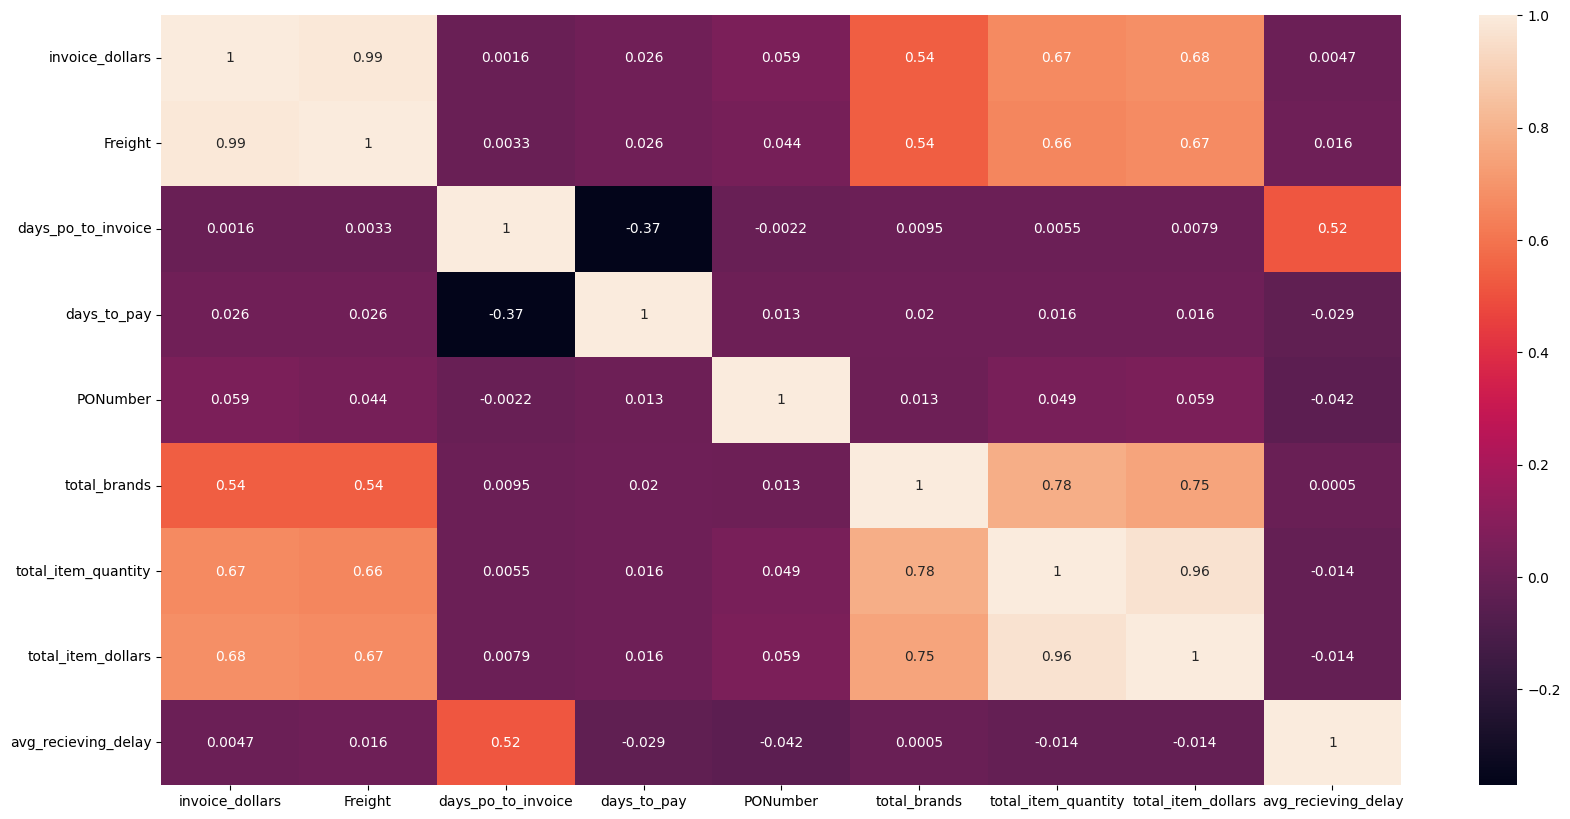

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.iloc[:,1:-1].corr(), annot=True)
plt.show()

In [34]:
flagged = df[df['flag_invoice']==1]
normal = df[df['flag_invoice']==0]

In [36]:
significant_features = []
non_significant_features = []
results = []

In [35]:
metrics = ['invoice_quantity','invoice_dollars','Freight','days_po_to_invoice','days_to_pay','total_brands','total_item_quantity','total_item_dollars','avg_recieving_delay']

In [38]:
from scipy.stats import ttest_ind

for metric in metrics:
    flagged_mean = flagged[metric].mean()
    normal_mean = normal[metric].mean()
    
    t_stat, p_value = ttest_ind(
        flagged[metric].dropna(),
        normal[metric].dropna(),
        equal_var = False
    )
    
    if p_value < 0.05 :
        significant_features.append(metric)
        results.append({
            "metric":metric,
            "flagged_mean":flagged_mean.round(2),
            "normal_mean": normal_mean.round(2),
            "p_value": p_value.round(3)
            
        })
    else:
        non_significant_features.append(metric)

In [39]:
non_significant_features

['days_to_pay', 'total_brands']

In [40]:
X = df[['invoice_quantity','invoice_dollars','Freight','days_po_to_invoice','total_brands','total_item_quantity','total_item_dollars']]
y = df['flag_invoice']

In [41]:
X.describe().round()

,invoice_quantity,invoice_dollars,Freight,days_po_to_invoice,total_brands,total_item_quantity,total_item_dollars
count,5543.0,5543.0,5543.0,5543.0,5543.0,5543.0,5543.0
mean,6059.0,58073.0,296.0,16.0,41.0,6059.0,58073.0
std,14453.0,140234.0,714.0,3.0,77.0,14453.0,140234.0
min,1.0,4.0,0.0,9.0,1.0,1.0,4.0
25%,83.0,968.0,5.0,14.0,3.0,83.0,968.0
50%,423.0,4765.0,25.0,16.0,7.0,423.0,4765.0
75%,5100.0,44587.0,230.0,19.0,46.0,5100.0,44587.0
max,141660.0,1660436.0,8468.0,23.0,807.0,141660.0,1660436.0


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [47]:
y_train.shape

(4434,)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.41905146, -0.41337729, -0.41423659, ..., -0.51172896,
        -0.42429059, -0.41941635],
       [-0.41822208, -0.4128181 , -0.41370306, ...,  0.77293737,
         1.75773241,  1.9383109 ],
       [-0.41863677, -0.41117485, -0.41246751, ...,  0.3187624 ,
         0.10171067, -0.06047013],
       ...,
       [-0.42029553, -0.41500167, -0.41590738, ..., -0.39494111,
        -0.41281111, -0.40407254],
       [-0.41518102, -0.41066312, -0.41182166, ..., -0.42089397,
        -0.39105678, -0.38342278],
       [ 0.72272765,  0.89559406,  0.87141635, ...,  0.21495098,
         0.74633325,  0.92175951]], shape=(4434, 7))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score


In [51]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train_scaled, y_train)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_scaled, y_train)

model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
def evaluate_model(model, X_test_scaled, y_test, model_name):
    preds = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, preds)
    score = classification_report(y_test, preds)
    
    print(f"\n{model_name} Performance: ")
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Score : {score}")
    

In [54]:
evaluate_model(model1, X_test_scaled, y_test, 'Logistic Regression')
evaluate_model(model2, X_test_scaled, y_test, 'Decision Tree Classifier')
evaluate_model(model3, X_test_scaled, y_test, 'Random Forest Classifier')


Logistic Regression Performance: 
Accuracy : 0.66
Score :               precision    recall  f1-score   support

           0       0.66      0.98      0.79       725
           1       0.56      0.06      0.11       384

    accuracy                           0.66      1109
   macro avg       0.61      0.52      0.45      1109
weighted avg       0.63      0.66      0.55      1109


Decision Tree Classifier Performance: 
Accuracy : 0.81
Score :               precision    recall  f1-score   support

           0       0.85      0.86      0.86       725
           1       0.73      0.71      0.72       384

    accuracy                           0.81      1109
   macro avg       0.79      0.79      0.79      1109
weighted avg       0.81      0.81      0.81      1109


Random Forest Classifier Performance: 
Accuracy : 0.87
Score :               precision    recall  f1-score   support

           0       0.85      0.97      0.91       725
           1       0.93      0.68      0.79       

In [55]:
model3.feature_importances_

array([0.13508129, 0.15804603, 0.15112636, 0.07718452, 0.08292739,
       0.17387231, 0.22176211])

In [56]:
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model3.feature_importances_,
}).sort_values(by='importance', ascending=False)

feature_importance

,feature,importance
6,total_item_dollars,0.221762
5,total_item_quantity,0.173872
1,invoice_dollars,0.158046
2,Freight,0.151126
0,invoice_quantity,0.135081
4,total_brands,0.082927
3,days_po_to_invoice,0.077185


In [57]:
X = df[['invoice_quantity','invoice_dollars','Freight','total_item_quantity','total_item_dollars']]
y = df['flag_invoice']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train_scaled, y_train)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_scaled, y_train)

model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
evaluate_model(model1, X_test_scaled, y_test, 'Logistic Regression')
evaluate_model(model2, X_test_scaled, y_test, 'Decision Tree Classifier')
evaluate_model(model3, X_test_scaled, y_test, 'Random Forest Classifier')


Logistic Regression Performance: 
Accuracy : 0.65
Score :               precision    recall  f1-score   support

           0       0.65      1.00      0.79       725
           1       0.60      0.01      0.02       384

    accuracy                           0.65      1109
   macro avg       0.63      0.50      0.40      1109
weighted avg       0.64      0.65      0.52      1109


Decision Tree Classifier Performance: 
Accuracy : 0.83
Score :               precision    recall  f1-score   support

           0       0.88      0.87      0.87       725
           1       0.76      0.77      0.76       384

    accuracy                           0.83      1109
   macro avg       0.82      0.82      0.82      1109
weighted avg       0.84      0.83      0.84      1109


Random Forest Classifier Performance: 
Accuracy : 0.88
Score :               precision    recall  f1-score   support

           0       0.87      0.97      0.92       725
           1       0.93      0.72      0.81       

In [62]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth" : [None, 4, 5, 6],
    "min_samples_split" :[2,3,5],
    "min_samples_leaf": [1,2,5],
    "criterion" : ['gini', 'entropy']
}

In [63]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth" : [None, 4, 5, 6],
    "min_samples_split" :[2,3,5],
    "min_samples_leaf": [1,2,5],
    "criterion" : ['gini', 'entropy']
}
scorer = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose = 2,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
evaluate_model(grid_search, X_test_scaled, y_test, "Random Forest Classifier")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

In [64]:
confusion_matrix(grid_search.predict(X_test_scaled), y_test)

array([[711, 110],
       [ 14, 274]])

In [65]:
confusion_matrix(model3.predict(X_test_scaled), y_test)

array([[705, 109],
       [ 20, 275]])

In [66]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}